In [1]:
import sys
sys.path.insert(0, "/Users/rstiskalek/Projects/candel")

import numpyro
numpyro.set_host_device_count(8)

import numpy as np
import matplotlib.pyplot as plt

import candel
from h5py import File

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
config_path = "/Users/rstiskalek/Projects/CANDEL/scripts/runs/config_shoes.toml"
data = candel.pvdata.load_SH0ES_from_config(config_path)

2025-06-10 18:40:49 warning: zero width found in the priors. Setting it to 1e-5.
2025-06-10 18:40:49 indices of zero width: [44]
2025-06-10 18:40:49 found zero-width prior at index 44. Setting it to 0.


In [19]:
with File("/Users/rstiskalek/Projects/CANDEL/results/SH0ES/Cepheid_distances_no_redshift.hdf5", 'r') as f:
    samples = {key: f["samples"][key][...] for key in f["samples"].keys()}


In [20]:
phi = np.deg2rad(data["RA_host"])
theta = np.pi / 2 - np.deg2rad(data["dec_host"])
mu_host = np.mean(samples["mu_host"], axis=0)

# Assume that H0 ~ 70 km/s/Mpc to convert mu_host to distance in Mpc / h
h = 0.7
r = np.power(10.0, mu_host / 5 - 5) * h

/var/folders/kv/90qm_jx508j4zhvy56lhf09m0000gn/T/ipykernel_30029/3644248042.py:13: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
/var/folders/kv/90qm_jx508j4zhvy56lhf09m0000gn/T/ipykernel_30029/3644248042.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


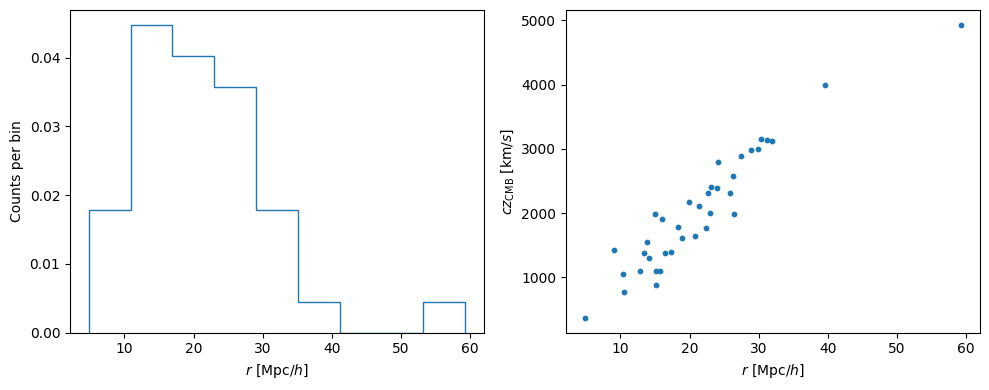

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)

# Left: Histogram
axes[0].hist(r, bins="auto", density=True, histtype='step', label="Cepheid distances")
axes[0].set_xlabel(r"$r~[\mathrm{Mpc}/h]$")
axes[0].set_ylabel("Counts per bin")

# Right: Scatter plot
axes[1].scatter(r, data["czcmb_cepheid_host"], s=10)
axes[1].set_xlabel(r"$r~[\mathrm{Mpc}/h]$")
axes[1].set_ylabel(r"$cz_{\rm CMB}~[\mathrm{km}/s]$")

fig.tight_layout()
fig.savefig("/Users/rstiskalek/Downloads/SH0ES_hosts.png", dpi=450)
fig.show()


In [54]:
import pecvelcov

fname_Pk = "/Users/rstiskalek/Projects/PecVelCov.jl/data/pk_fiducial.npy"
covmat_brute = pecvelcov.CovmatBrute(fname_Pk)
C = covmat_brute(r, theta, phi)
print("Finished! Computed the covariance matrix to be:")
print(C)

Finished! Computed the covariance matrix to be:
[[ 1.92388115e+04 -3.22765901e+01 -1.66955458e+02 ... -1.10753598e+02
  -3.53455277e+01  1.92674641e+02]
 [-3.22765901e+01  3.51242788e+04  4.20318078e+03 ...  3.55234449e+03
   2.22035003e+03 -3.28453597e+03]
 [-1.66955458e+02  4.20318078e+03  3.47808161e+04 ...  3.31728738e+03
   3.35129522e+03 -2.29245467e+03]
 ...
 [-1.10753598e+02  3.55234449e+03  3.31728738e+03 ...  3.60511749e+04
   8.22304770e+02 -2.58164087e+03]
 [-3.53455277e+01  2.22035003e+03  3.35129522e+03 ...  8.22304770e+02
   3.76377477e+04 -1.34113549e+03]
 [ 1.92674641e+02 -3.28453597e+03 -2.29245467e+03 ... -2.58164087e+03
  -1.34113549e+03  3.48324371e+04]]


Progress: 100%|█████████████████████████████████████████| Time: 0:01:32KK


In [67]:
filename_out = "/Users/rstiskalek/Projects/CANDEL/data/SH0ES/processed/PV_covmat_cepheid_hosts_fiducial.npy"
np.save(filename_out, C)

### Plot a correlation matrix

/var/folders/kv/90qm_jx508j4zhvy56lhf09m0000gn/T/ipykernel_28027/1928279143.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


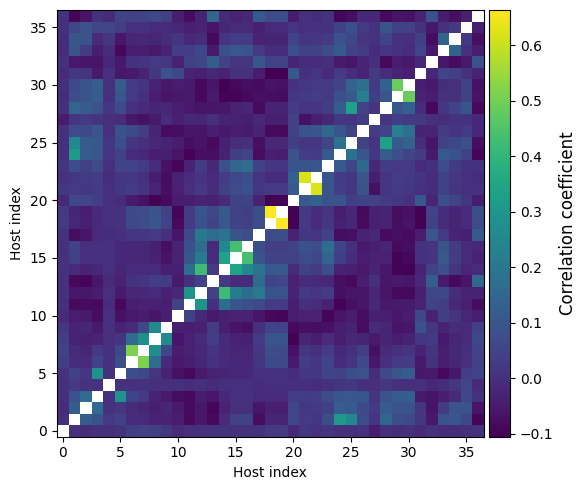

In [61]:
# Convert to correlation matrix
D = np.sqrt(np.diag(C))
corr = C / np.outer(D, D)
corr[np.isnan(corr)] = 0.0

# Exclude diagonal
np.fill_diagonal(corr, np.nan)

fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(corr, cmap="viridis", origin="lower", )

cbar = plt.colorbar(im, ax=ax, pad=0.01)
cbar.set_label("Correlation coefficient", fontsize=12)

ax.set_xlabel("Host index",)
ax.set_ylabel("Host index",)
ax.tick_params(axis='both',)

fig.tight_layout()
fig.savefig("/Users/rstiskalek/Downloads/pecvelcov_correlation_matrix.png", bbox_inches='tight', dpi=400)

fig.show()

In [ ]:
j10**(mu_host / 5 - 5)

array([ 6.941938 , 39.258316 , 37.5138   , 33.049038 , 84.67364  ,
       32.714405 , 19.180874 , 18.340313 , 20.14573  , 19.779596 ,
       26.167244 , 34.170277 , 32.004875 , 41.24984  , 29.769861 ,
       26.954344 , 24.72398  , 36.987434 , 21.576881 , 22.511187 ,
       21.341623 , 15.0887165, 14.904369 , 23.433018 , 34.418488 ,
       42.667706 , 22.942993 , 13.024637 , 43.23255  , 28.341019 ,
       30.429344 , 21.691563 , 45.491062 , 32.324017 , 44.594128 ,
       56.638016 , 37.7688   ], dtype=float32)

In [21]:
H0

70

In [20]:
r

array([ 485.93567, 2748.082  , 2625.966  , 2313.4326 , 5927.155  ,
       2290.0083 , 1342.6611 , 1283.8219 , 1410.201  , 1384.5718 ,
       1831.707  , 2391.9194 , 2240.3413 , 2887.4888 , 2083.8904 ,
       1886.8041 , 1730.6786 , 2589.1204 , 1510.3817 , 1575.7831 ,
       1493.9136 , 1056.2102 , 1043.3059 , 1640.3113 , 2409.2942 ,
       2986.7395 , 1606.0095 ,  911.7246 , 3026.2786 , 1983.8713 ,
       2130.0542 , 1518.4094 , 3184.3743 , 2262.6812 , 3121.5889 ,
       3964.6611 , 2643.816  ], dtype=float32)

In [18]:
mu_host

array([29.207403, 32.969658, 32.870956, 32.595795, 34.63874 , 32.573696,
       31.414343, 31.317034, 31.520916, 31.481087, 32.08879 , 32.668243,
       32.52608 , 33.07711 , 32.368885, 32.153145, 31.965591, 32.84027 ,
       31.669943, 31.761992, 31.646137, 30.893261, 30.866568, 31.84914 ,
       32.68396 , 33.150497, 31.80325 , 30.573828, 33.179054, 32.262077,
       32.416462, 31.681454, 33.28963 , 32.547626, 33.246387, 33.76554 ,
       32.885666], dtype=float32)